# Importing Necessary Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# **Importing And Exploring The Dataset**

In [25]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
print(f'The Shape of the Dataset is : {data.shape}')

The Shape of the Dataset is : (200, 5)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
# Drop Feature CustomerID
data.drop('CustomerID',axis = 1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [31]:
# Checking for Missing Values
data_missings = data.isna().sum()
data_missings = data_missings[data_missings>0]
if data_missings.empty:
    print('The Dataset Is Free From Missings')
else:
    print(f'The Dataset Has Missings in the following Features : {data_missings.index}')

The Dataset Is Free From Missings


# Visualizing the Dataset

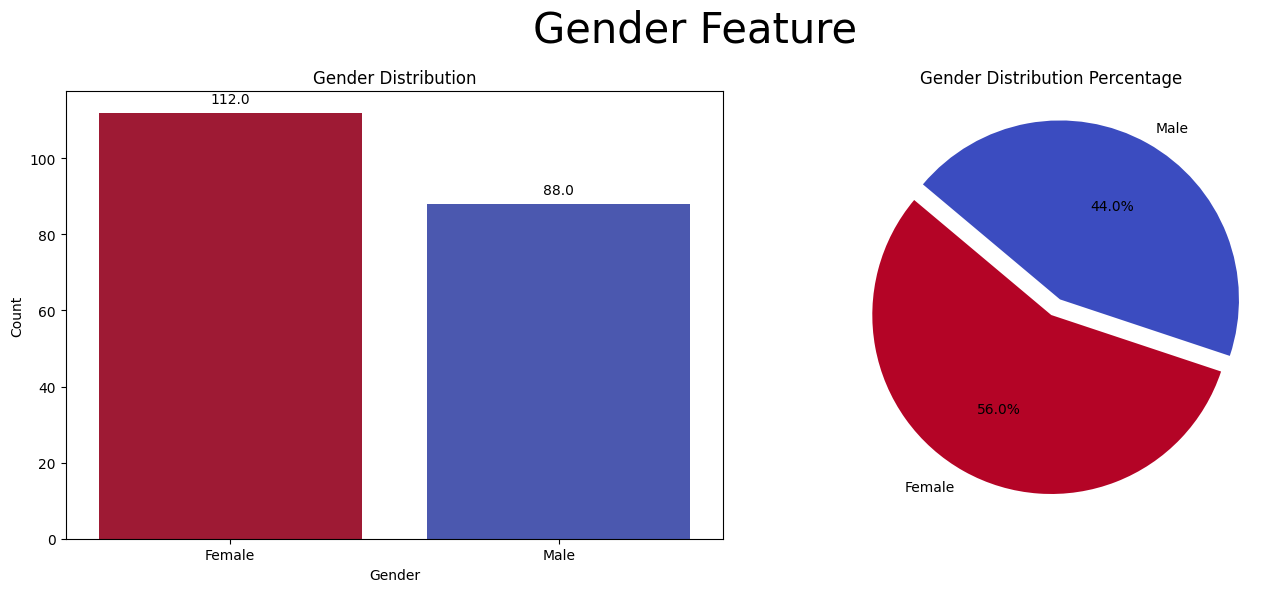

In [51]:
# Visualize the Distribution of the Gender

# Calculate the gender distribution
gender_counts = data['Gender'].value_counts()
total_counts = gender_counts.sum()
gender_percentages = (gender_counts / total_counts) * 100

# Normalize gender counts for colormap
norm = plt.Normalize(gender_counts.min(), gender_counts.max())
colors = plt.cm.coolwarm(norm(gender_counts.values))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Gender Feature',fontsize=30)

# Bar plot with coolwarm colormap
bars = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors, ax=ax1)
ax1.set_title('Gender Distribution')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Pie chart with percentages and exploded smaller piece
explode = [0.1 if pct == gender_percentages.min() else 0 for pct in gender_percentages]
ax2.pie(gender_percentages, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.coolwarm(norm(gender_counts.values)))
ax2.set_title('Gender Distribution Percentage')

# Display the plots
plt.tight_layout()
plt.show()


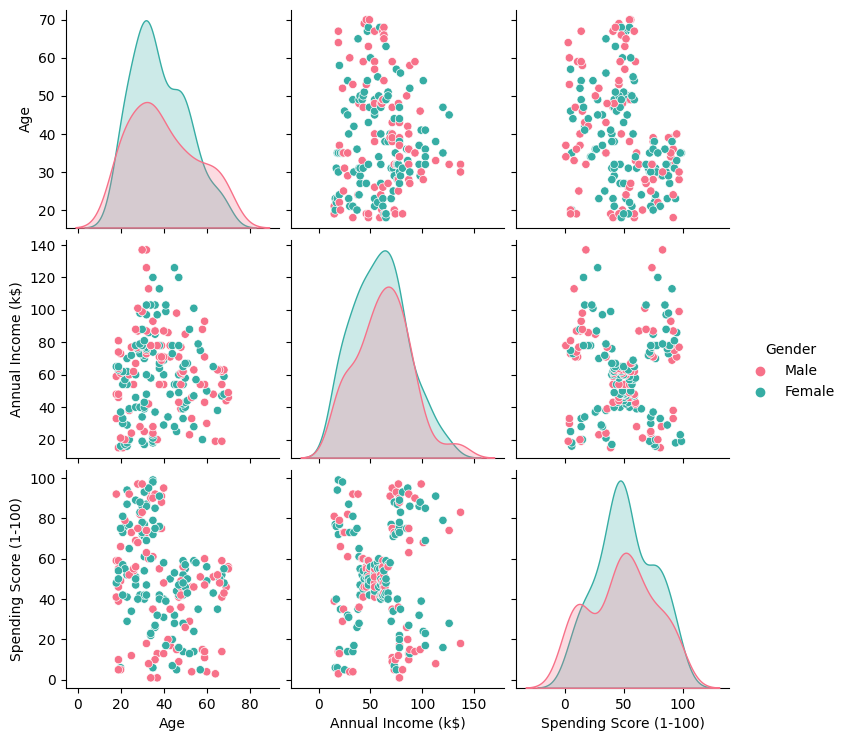

In [52]:
sns.pairplot(data,hue="Gender",palette='husl')
plt.show()

In [86]:
# plt.style.available
plt.style.use('fivethirtyeight')

In [124]:
def elbow_method(X_scaled):
    # Elbow method to find the optimal number of clusters
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    return wcss

In [93]:
def plot_elbow(wcss,point=0):
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#44AA99', markersize=8)
    plt.title('Elbow Method for Optimal Number of Clusters', fontsize=15, fontweight='bold')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('WCSS', fontsize=12)
    plt.xticks(range(1, 11), fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.7)
    if point != 0:
        plt.axvline(x=point, color='r', linestyle='--')  # Optional: Highlight the elbow point if known

    plt.tight_layout()

In [147]:
def scatter_clusters(y_kmeans,X_scaled,X,val):
    # Plot the clusters
    plt.figure(figsize=(10, 6))

    # Define colors for the clusters
    colors = ['y', 'orange', 'b', 'c'] if val == 4 else ['y', 'orange', 'b', 'c','g']

    for i in range(val):
        plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], 
                    s=100, c=colors[i], label=f'Cluster {i+1}')

    # Plot the centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', label='Centroids',marker='x')

    plt.title('Clusters of Customers', fontsize=15, fontweight='bold')
    plt.xlabel(f'{X.columns[0]}', fontsize=12)
    plt.ylabel(f'{X.columns[1]}', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.tight_layout()

    plt.show()

**1-Grouping using Age and Annual Income(k$)**

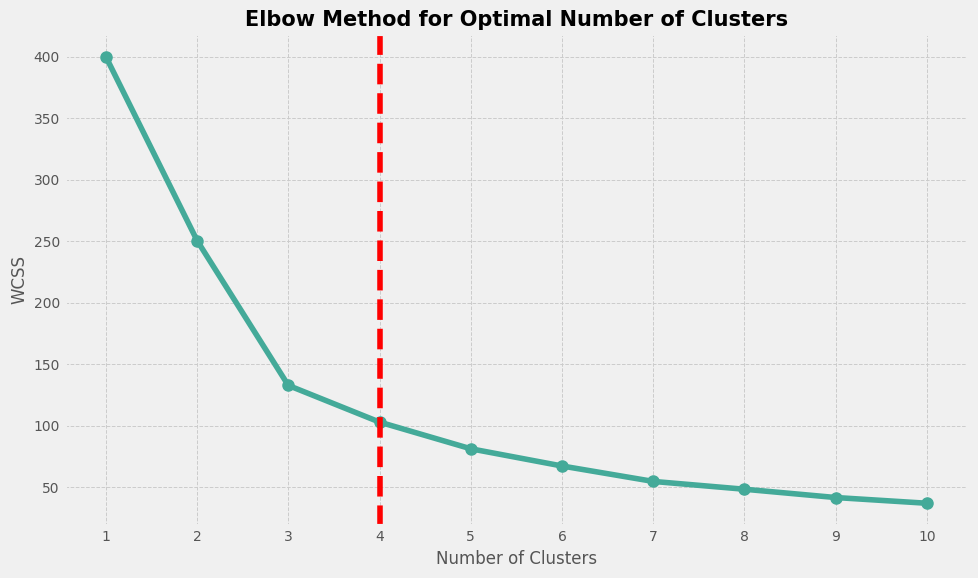

In [140]:
# Extract features
X1 = data[['Age', 'Annual Income (k$)']]

# Standardize the data
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Find the WCSS For the Elbow Method
wcss1 = elbow_method(X1_scaled)

# Plot the Result Of the Elbow Method
plot_elbow(wcss1,4)


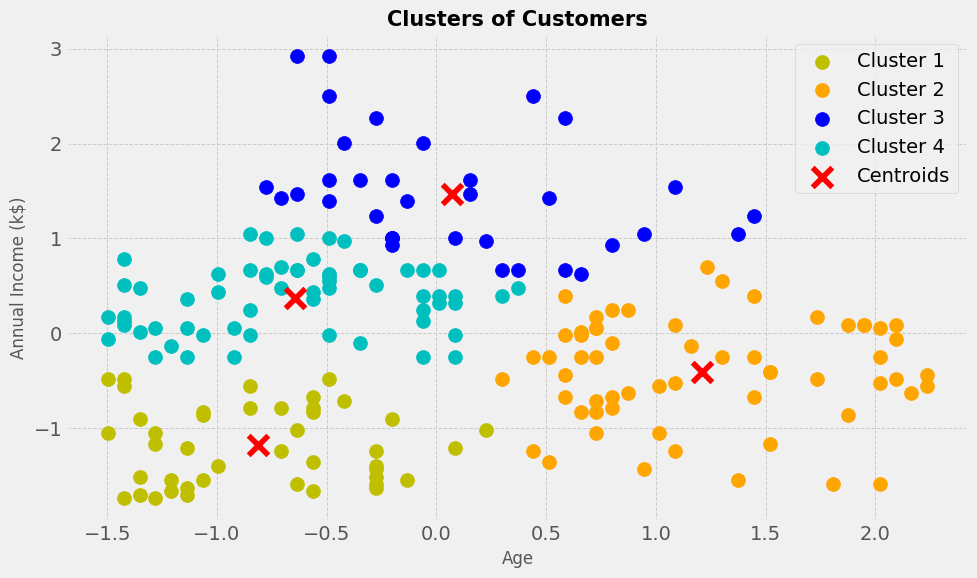

In [142]:
# Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans1 = kmeans.fit_predict(X1_scaled)

# Scatter the Clusters
scatter_clusters(y_kmeans1,X1_scaled,X1,4)

**2-Grouping using Age and Spending Score (1-100)**

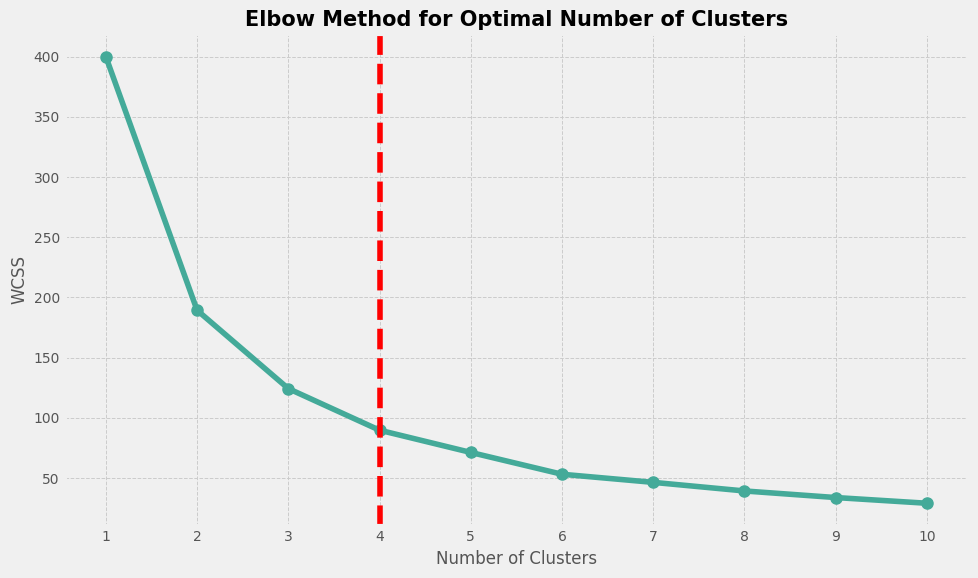

In [143]:
# Extract features
X2 = data[['Age', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Find the WCSS For the Elbow Method
wcss2 = elbow_method(X2_scaled)

# Plot the Result Of the Elbow Method
plot_elbow(wcss2,4)


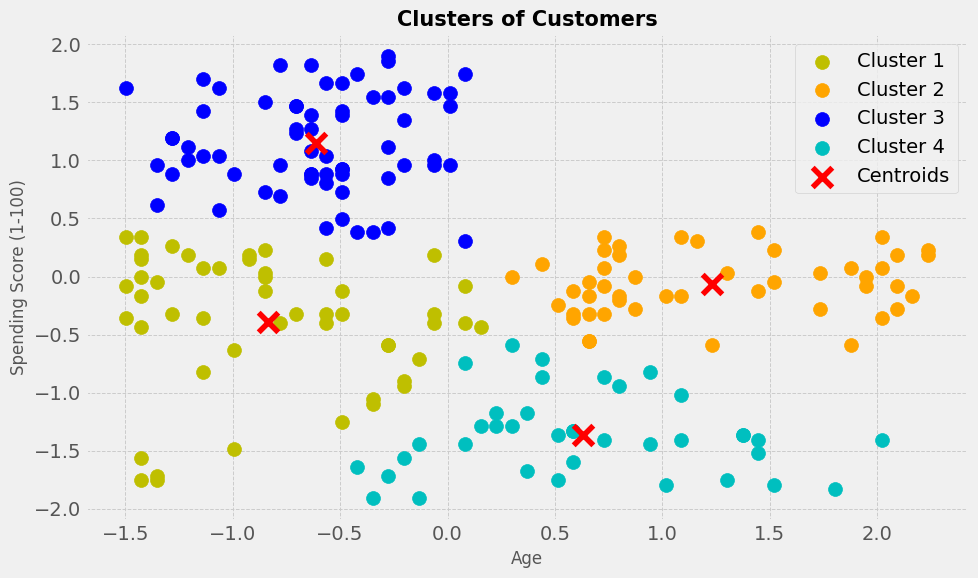

In [144]:
# Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans2 = kmeans.fit_predict(X2_scaled)

# Scatter the Clusters
scatter_clusters(y_kmeans2,X2_scaled,X2,4)

**3-Grouping Using Annual Income (k$) And Spending Score (1-100)**

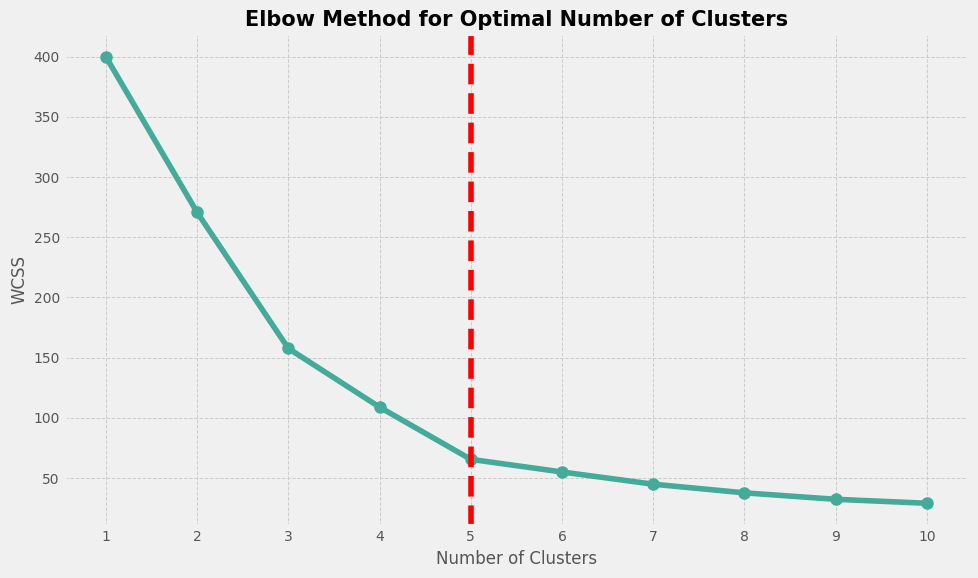

In [145]:
# Extract features
X3 = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Find the WCSS For the Elbow Method
wcss3 = elbow_method(X3_scaled)

# Plot the Result Of the Elbow Method
plot_elbow(wcss3,5)


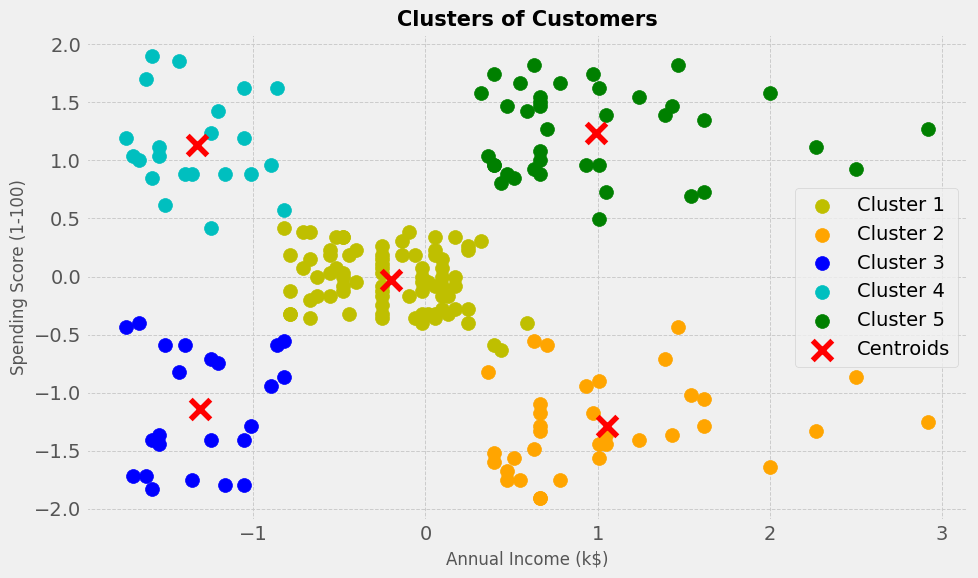

In [148]:
# Apply KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans3 = kmeans.fit_predict(X3_scaled)

# Scatter the Clusters
scatter_clusters(y_kmeans3,X3_scaled,X3,5)